# Haar System

In [36]:
import numpy as np

def approximation(array):
    return array[:int(len(array)/2)]

def details(array):
    return array[int(len(array)/2):]

def i_num(array):
    return int(np.ceil(np.log2(len(array))))

root2 = np.sqrt(2)
s = np.array([32, 32, 16, 8, 24, 16, 64, 32])

### For METHOD


In [28]:
def direct_wavelet(array,output):
    N, N2, = len(array), int(len(array)/2)
    for i in range(0,N,2):
        output[int(i/2)] = (array[i] + array[i+1])/root2
        output[int(i/2 + N2)] = (array[i] - array[i+1])/root2
    return output

def inverse_wavelet(output,signal):
    N, N2,  = len(output), int(len(output)/2)
    for i in range(0,N,2):
        signal[i] = (output[int(i/2)] + output[int(i/2 + N2)])/root2
        signal[i+1] = (output[int(i/2)] - output[int(i/2 + N2)])/root2
    return signal


In [29]:
# DIRECT WEVELET TRANSFORM --> dwt
dwt = np.empty(len(s))
dwt = direct_wavelet(s,dwt)
print("\nApproximation coefficients (A1):", approximation(dwt))
print("Detail coefficients (D1):", details(dwt))

dwt2 = np.empty(len(approximation(dwt)))
dwt2 = direct_wavelet(approximation(dwt),dwt2)
print("\nApproximation coefficients (A2):", approximation(dwt2))
print("Detail coefficients (D2):", details(dwt2))


dwt3 = np.empty(len(approximation(dwt2)))
dwt3 = direct_wavelet(approximation(dwt2),dwt3)
print("\nApproximation coefficients (A3):", approximation(dwt3))
print("Detail coefficients (D3):", details(dwt3))


Approximation coefficients (A1): [45.254834   16.97056275 28.28427125 67.88225099]
Detail coefficients (D1): [ 0.          5.65685425  5.65685425 22.627417  ]

Approximation coefficients (A2): [44. 68.]
Detail coefficients (D2): [ 20. -28.]

Approximation coefficients (A3): [79.19595949]
Detail coefficients (D3): [-16.97056275]


In [35]:
# INVERSE WEVELET TRANSFORM
print("\nApproximation coefficients (A3):", approximation(dwt3))

rest_s2 = np.empty(2*len(approximation(dwt3)))
rest_s2 = inverse_wavelet(dwt3,rest_s2)
print("\nReconstructed Signal A2:", rest_s2)

rest_s1 = np.empty(2*len(approximation(dwt2)))
rest_s1 = inverse_wavelet(dwt2,rest_s1)
print("\nReconstructed Signal A1:", rest_s1)

rest_s = np.empty(2*len(approximation(dwt)))
rest_s = inverse_wavelet(dwt,rest_s)
print("\nReconstructed Signal:", rest_s)
print("Original Signal:", s)


Approximation coefficients (A3): [79.19595949]

Reconstructed Signal A2: [44. 68.]

Reconstructed Signal A1: [45.254834   16.97056275 28.28427125 67.88225099]

Reconstructed Signal: [32. 32. 16.  8. 24. 16. 64. 32.]
Original Signal: [32 32 16  8 24 16 64 32]


## IMAGE DWT

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [39]:
def direct_wavelet_2D(image, output):
    rows, cols = image.shape
    for i in range(rows):
        output[i, :] = direct_wavelet(image[i, :], output[i, :])
    for j in range(cols):
        output[:, j] = direct_wavelet(output[:, j], output[:, j])
    return output

def inverse_wavelet_2D(output, signal):
    rows, cols = output.shape
    for j in range(cols):
        signal[:, j] = inverse_wavelet(output[:, j], signal[:, j])
    for i in range(rows):
        signal[i, :] = inverse_wavelet(signal[i, :], signal[i, :])
    return signal

C:\Users\ZIGH\AppData\Local\Temp\ipykernel_13516\4184011031.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  output[int(i/2 + N2)] = (array[i] - array[i+1])/root2
C:\Users\ZIGH\AppData\Local\Temp\ipykernel_13516\4184011031.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  output[int(i/2)] = (array[i] + array[i+1])/root2


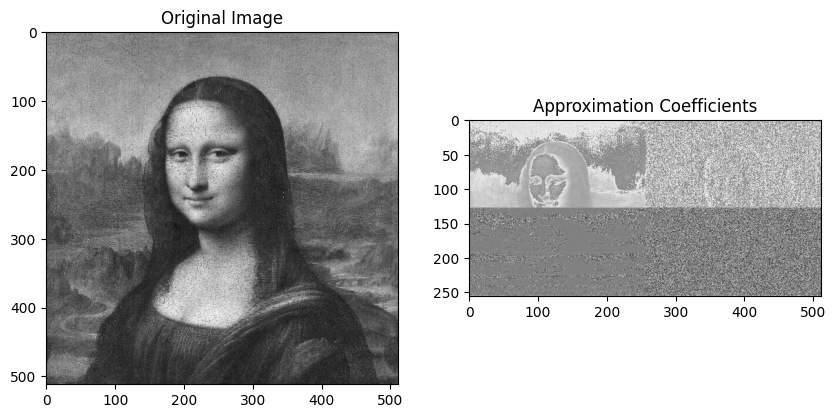

In [53]:
image = cv2.imread(r'C:\Users\ZIGH\Documents\ENSEA\INTERNSHIP\Wavelet-Transform\image_gray.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar transformada wavelet directa
output = np.empty_like(image, dtype=float)
output = direct_wavelet_2D(image, output)

# Obtener coeficientes de aproximación y detalle
approx_coeffs = approximation(output)
detail_coeffs = details(output)

# Mostrar resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(approx_coeffs, cmap='gray')
axes[1].set_title('Approximation Coefficients')

plt.show()

In [ ]:
# Aplicar transformada wavelet inversa
reconstructed_image = np.empty_like(image, dtype=float)
reconstructed_image = inverse_wavelet_2D(output, reconstructed_image)

fig, axes = plt.subplots(1, figsize=(12, 4))
axes[0].imshow(reconstructed_image.astype(np.uint8), cmap='gray')
axes[0].set_title('Reconstructed Image')
axes[0].axis('off')


plt.show()